In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from geopy.distance import great_circle

In [2]:
data=pd.read_excel('Cluster_KOTA_results.xlsx')
data


,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota
0,1,Fri,Even,601684654,Retail,-6.03832,106.629,Kota Tangerang
1,1,Fri,Even,601685369,Retail,-6.03169,106.667,Kota Tangerang
2,1,Fri,Even,601685370,Retail,-6.02247,106.670,Kota Tangerang
3,1,Fri,Even,601685519,Retail,-6.03414,106.634,Kota Tangerang
4,1,Fri,Even,601685520,Retail,-6.03408,106.633,Kota Tangerang
...,...,...,...,...,...,...,...,...
38792,84,Wed,Odd,602455642,Retail,-6.35610,106.763,Tangerang Selatan
38793,84,Wed,Odd,602751417,Retail,-6.35543,106.765,Tangerang Selatan
38794,84,Wed,Odd,602769095,Retail,-6.35637,106.749,Tangerang Selatan
38795,84,Wed,Odd,602769096,Retail,-6.35642,106.749,Tangerang Selatan


In [3]:
outlet_counts = data.groupby(['Salesman', 'Kota']).size().unstack(fill_value=0)

# Reset index untuk memudahkan plot
outlet_counts = outlet_counts.reset_index()
outlet_counts

Kota,Salesman,Kabupaten Tangerang,Kota Tangerang,Tangerang Selatan
0,1,0,374,0
1,2,0,463,0
2,3,0,463,0
3,4,0,463,0
4,5,0,463,0
...,...,...,...,...
79,80,87,0,376
80,81,73,0,390
81,82,81,0,382
82,83,113,0,350


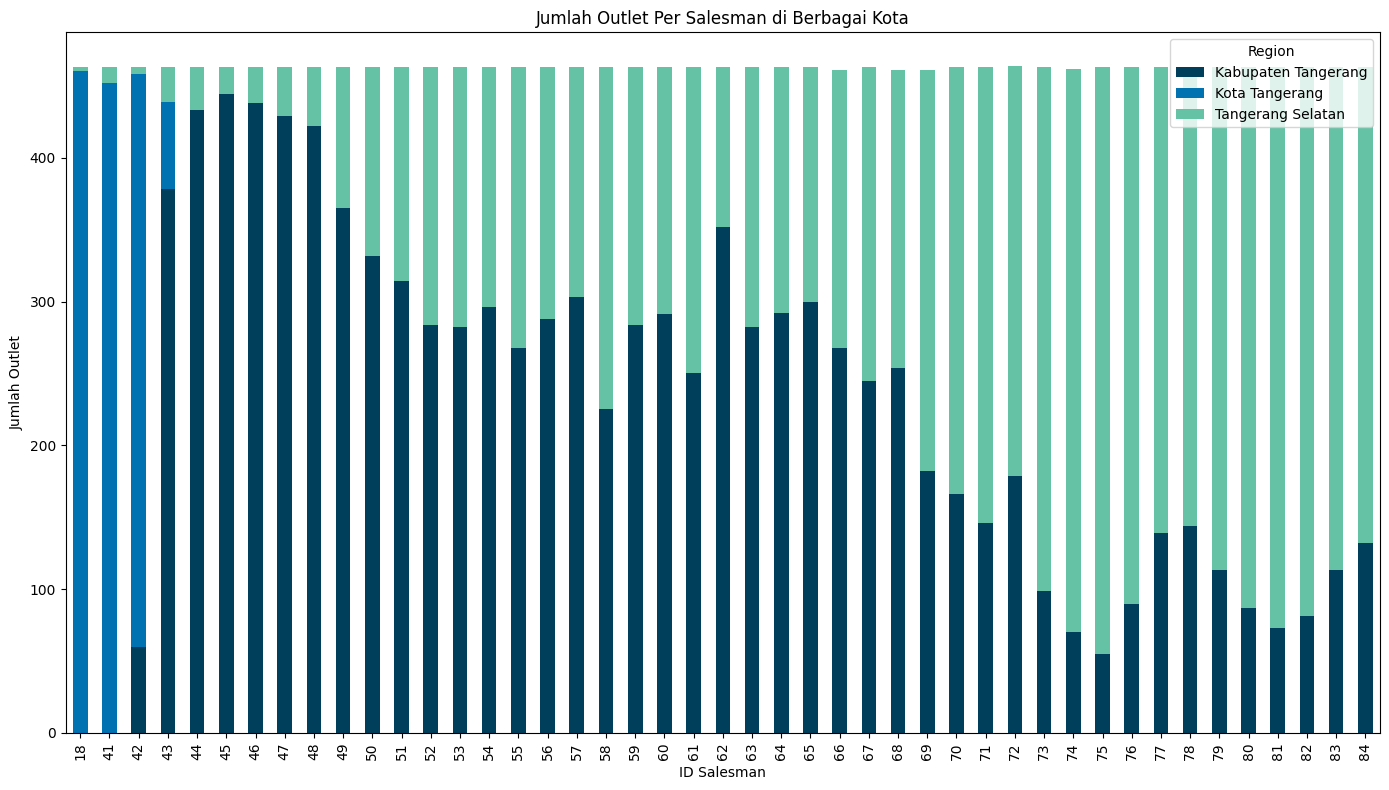

In [4]:
# salesman Tangsel
salesmen_tangsel = set(data[data['Kota'] == 'Tangerang Selatan']['Salesman'])

# salesman Kota Tangerang
salesmen_kota_tangerang = set(data[data['Kota'] == 'Kota Tangerang']['Salesman'])

# salesman Kabupaten Tangerang
salesmen_kabupaten_tangerang = set(data[data['Kota'] == 'Kabupaten Tangerang']['Salesman'])

# Temukan salesman yang terdaftar di ketiga kota
salesmen_all_three = salesmen_tangsel.intersection(salesmen_kota_tangerang).intersection(salesmen_kabupaten_tangerang)

# Temukan salesman yang terdaftar di dua dari tiga kota
salesmen_two_cities = (salesmen_tangsel.intersection(salesmen_kota_tangerang) | salesmen_tangsel.intersection(salesmen_kabupaten_tangerang) | salesmen_kota_tangerang.intersection(salesmen_kabupaten_tangerang))

# Menghilangkan salesman yang terdaftar di ketiga kota dari hasil di atas
salesmen_two_cities = salesmen_two_cities - salesmen_all_three

# Gabungkan salesman yang ada di dua kota dan tiga kota
salesmen_more_than_two = salesmen_all_three.union(salesmen_two_cities)

# Filter data untuk hanya menyertakan salesman yang ada di lebih dari dua kota
data_filtered = data[data['Salesman'].isin(salesmen_more_than_two)]

# Hitung jumlah outlet per salesman untuk masing-masing kota
outlet_counts = data_filtered.groupby(['Salesman', 'Kota']).size().unstack(fill_value=0)

# Reset index untuk memudahkan plot
outlet_counts = outlet_counts.reset_index()

# Menyiapkan plot
fig, ax = plt.subplots(figsize=(14, 8))
colors = ['#003f5c', '#0072b2', '#66c2a5']  # Warna biru gelap, biru medium, biru muda

# Plot batang bertumpuk
outlet_counts.set_index('Salesman').plot(kind='bar', stacked=True, ax=ax, color=colors)

# Menambahkan label dan judul
ax.set_xlabel('ID Salesman')
ax.set_ylabel('Jumlah Outlet')
ax.set_title('Jumlah Outlet Per Salesman di Berbagai Kota')
ax.legend(title='Region')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [5]:
df_both_cities = data[data['Salesman'].isin(salesmen_more_than_two)]
print("\nDetail Salesman yang terdaftar di lebih dari satu kota:")
df_both_cities 


Detail Salesman yang terdaftar di lebih dari satu kota:


,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota
7782,18,Fri,Even,600453181,Retail,-6.15148,106.579,Kota Tangerang
7783,18,Fri,Even,600453456,Retail,-6.15137,106.571,Kota Tangerang
7784,18,Fri,Even,600453476,Retail,-6.15152,106.575,Kota Tangerang
7785,18,Fri,Even,600453478,Retail,-6.15150,106.571,Kota Tangerang
7786,18,Fri,Even,600453481,Retail,-6.15152,106.575,Kota Tangerang
...,...,...,...,...,...,...,...,...
38792,84,Wed,Odd,602455642,Retail,-6.35610,106.763,Tangerang Selatan
38793,84,Wed,Odd,602751417,Retail,-6.35543,106.765,Tangerang Selatan
38794,84,Wed,Odd,602769095,Retail,-6.35637,106.749,Tangerang Selatan
38795,84,Wed,Odd,602769096,Retail,-6.35642,106.749,Tangerang Selatan


In [6]:
df_both_cities['Salesman'].nunique()

45

In [7]:
data['Kota'].value_counts()

Kota
Kota Tangerang         19339
Kabupaten Tangerang    10248
Tangerang Selatan       9210
Name: count, dtype: int64

In [8]:
outlets_kota_tangerang =len(data[data['Kota']=='Kota Tangerang'])
outlets_kab_tangerang =len(data[data['Kota']=='Kabupaten Tangerang'])
outlets_tangsel =len(data[data['Kota']=='Tangsel'])


In [9]:
total_salesmen = data['Salesman'].nunique()
total_salesmen

84

In [10]:
total_outlets = data['ID Outlet'].count()
total_outlets 

np.int64(38797)

In [11]:
outlets_kota_tangerang = len(data[data['Kota'] == 'Kota Tangerang'])
outlets_kab_tangerang = len(data[data['Kota'] == 'Kabupaten Tangerang'])
outlets_tangsel = len(data[data['Kota'] == 'Tangerang Selatan'])

# Total jumlah outlet dan total salesman
total_salesmen = data['Salesman'].nunique()
total_outlets = data['ID Outlet'].count()

# Hitung proporsi untuk setiap kota
proporsi_kota_tangerang = outlets_kota_tangerang / total_outlets
proporsi_kab_tangerang = outlets_kab_tangerang / total_outlets
proporsi_tangsel = outlets_tangsel / total_outlets

# Hitung jumlah salesman ideal untuk setiap kota berdasarkan proporsi
salesman_ideal_kota_tangerang = round(proporsi_kota_tangerang * total_salesmen)
salesman_ideal_kab_tangerang = round(proporsi_kab_tangerang * total_salesmen)
salesman_ideal_tangsel = round(proporsi_tangsel * total_salesmen)

# Tampilkan hasil
print(f"Jumlah Outlet Kota Tangerang: {outlets_kota_tangerang}")
print(f"Jumlah Outlet Kabupaten Tangerang: {outlets_kab_tangerang}")
print(f"Jumlah Outlet Tangerang Selatan: {outlets_tangsel}")
print(f"Total Salesmen: {total_salesmen}")
print(f"Total Outlets: {total_outlets}")

print(f"\nProporsi Outlet Kota Tangerang: {proporsi_kota_tangerang:.2%}")
print(f"Proporsi Outlet Kabupaten Tangerang: {proporsi_kab_tangerang:.2%}")
print(f"Proporsi Outlet Tangerang Selatan: {proporsi_tangsel:.2%}")

print(f"\nSalesman Ideal Kota Tangerang: {salesman_ideal_kota_tangerang}")
print(f"Salesman Ideal Kabupaten Tangerang: {salesman_ideal_kab_tangerang}")
print(f"Salesman Ideal Tangerang Selatan: {salesman_ideal_tangsel}")

Jumlah Outlet Kota Tangerang: 19339
Jumlah Outlet Kabupaten Tangerang: 10248
Jumlah Outlet Tangerang Selatan: 9210
Total Salesmen: 84
Total Outlets: 38797

Proporsi Outlet Kota Tangerang: 49.85%
Proporsi Outlet Kabupaten Tangerang: 26.41%
Proporsi Outlet Tangerang Selatan: 23.74%

Salesman Ideal Kota Tangerang: 42
Salesman Ideal Kabupaten Tangerang: 22
Salesman Ideal Tangerang Selatan: 20


In [12]:
# rata2 salesman akan mengunjungi outlet per harinya
outlets_kota_tangerang/42, outlets_kab_tangerang/22, outlets_tangsel/20

(460.45238095238096, 465.8181818181818, 460.5)

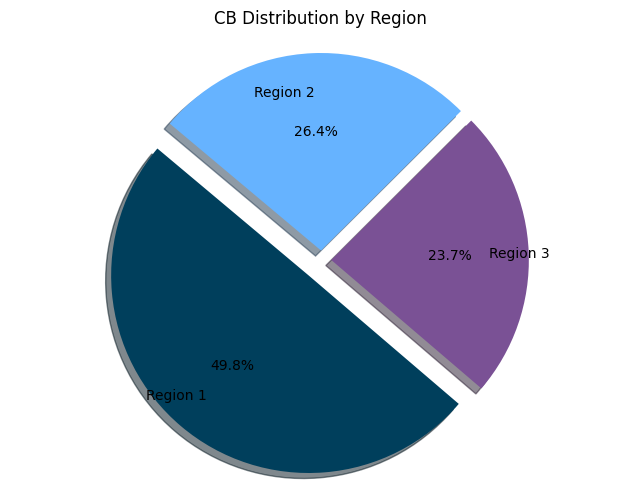

NameError: name 'a' is not defined

In [13]:
labels = ['Region 1', 'Region 3', 'Region 2']
sizes = [outlets_kota_tangerang, outlets_tangsel, outlets_kab_tangerang]

colors = ['#003f5c', '#7a5195', '#66b3ff']

# Explode
explode = (0.1, 0.05, 0.05)  

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140,labeldistance=0.8)
plt.title('CB Distribution by Region')
plt.axis('equal')

plt.show()


In [14]:
data_tangerang=data[data['Kota']=='Tangerang']
data_tangerang # jadi 60 salesman
# kota
# Tangerang    29196
# Tangsel       9603

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota


print(f"\nSalesman Ideal Kota Tangerang: {salesman_ideal_kota_tangerang}")
print(f"Salesman Ideal Kabupaten Tangerang: {salesman_ideal_kab_tangerang}")
print(f"Salesman Ideal Tangerang Selatan: {salesman_ideal_tangsel}")

Salesman Ideal Kota Tangerang: 42
Salesman Ideal Kabupaten Tangerang: 22
Salesman Ideal Tangerang Selatan: 20

### `Tangerang Selatan`

In [15]:
data_tangsel=data[data['Kota']=='Tangerang Selatan']
data_tangsel # Salesman Ideal Tangerang Selatan: 20

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota
8040,18,Thurs,Even,601684483,Retail,-6.15335,106.844,Tangerang Selatan
8047,18,Thurs,Even,602055437,Retail,-6.15335,106.844,Tangerang Selatan
8048,18,Thurs,Even,602055438,Retail,-6.15335,106.844,Tangerang Selatan
18465,41,Fri,Even,602458319,Retail,-6.20747,106.721,Tangerang Selatan
18466,41,Fri,Even,602458321,Retail,-6.20746,106.721,Tangerang Selatan
...,...,...,...,...,...,...,...,...
38792,84,Wed,Odd,602455642,Retail,-6.35610,106.763,Tangerang Selatan
38793,84,Wed,Odd,602751417,Retail,-6.35543,106.765,Tangerang Selatan
38794,84,Wed,Odd,602769095,Retail,-6.35637,106.749,Tangerang Selatan
38795,84,Wed,Odd,602769096,Retail,-6.35642,106.749,Tangerang Selatan


Center Latitude= 6.20949
Center Longitude= 106.60856

In [16]:
data_tangsel[data_tangsel['Channel']=='Grosir']

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota
30031,66,Fri,Even,602456141,Grosir,-6.27725,106.753,Tangerang Selatan
30032,66,Fri,Even,602456142,Grosir,-6.27714,106.755,Tangerang Selatan
30033,66,Fri,Even,602456143,Grosir,-6.27709,106.754,Tangerang Selatan
30040,66,Fri,Even,602752033,Grosir,-6.27675,106.755,Tangerang Selatan
30062,66,Fri,Odd,602456141,Grosir,-6.27725,106.753,Tangerang Selatan
...,...,...,...,...,...,...,...,...
34131,74,Wed,Odd,600007856,Grosir,-6.31102,106.755,Tangerang Selatan
34135,74,Wed,Odd,601287809,Grosir,-6.31070,106.768,Tangerang Selatan
34136,74,Wed,Odd,601287818,Grosir,-6.31114,106.768,Tangerang Selatan
34138,74,Wed,Odd,601288035,Grosir,-6.31119,106.755,Tangerang Selatan


In [17]:

data_tangsel = data_tangsel.copy()
# Fungsi untuk menghitung jarak
def calculate_distance(lat1, lon1, lat2, lon2):
    return great_circle((lat1, lon1), (lat2, lon2)).km

# Misalkan data_tangsel adalah DataFrame yang telah diisi dengan data
# Definisikan titik pusat
center_lat = -6.20949
center_lon = 106.60856

# Hitung jarak dari titik pusat
data_tangsel['Distance'] = data_tangsel.apply(lambda row: calculate_distance(center_lat, center_lon, row['Latitude'], row['Longitude']), axis=1)

# Urutkan data_tangsel berdasarkan jarak
data_tangsel_sorted = data_tangsel.sort_values(by='Distance').reset_index(drop=True)

# Tentukan jumlah kelompok dan ukuran setiap kelompok
num_groups = salesman_ideal_tangsel
total_rows = len(data_tangsel_sorted)
group_size = total_rows // num_groups
remainder = total_rows % num_groups

# Inisialisasi kolom Group dengan nilai default
data_tangsel_sorted['Group'] = np.zeros(total_rows, dtype=int)

# Tentukan batas untuk setiap kelompok
boundaries = [i * group_size + min(i, remainder) for i in range(num_groups + 1)]

# Alokasikan setiap baris ke kelompok yang sesuai
group_index = 0
for i in range(total_rows):
    if i >= boundaries[group_index + 1]:
        group_index += 1
    data_tangsel_sorted.at[i, 'Group'] = group_index

# Penyesuaian untuk ID Outlet yang sama
# Menentukan kuota untuk setiap kelompok
group_counts = data_tangsel_sorted['Group'].value_counts().sort_index()
max_group_size = group_size + 1 if remainder > 0 else group_size

# Mengalokasikan ID Outlet dengan ID yang sama
def adjust_groups(df):
    # Menyimpan kelompok yang disesuaikan
    adjusted_groups = df.copy()

    # Daftar ID Outlet yang sama
    duplicate_ids = df[df.duplicated(['ID Outlet'], keep=False)]['ID Outlet'].unique()
    
    for outlet_id in duplicate_ids:
        subset = df[df['ID Outlet'] == outlet_id]
        
        # Tentukan kelompok untuk ID Outlet yang sama
        prev_group = None
        for index, row in subset.iterrows():
            current_group = row['Group']
            if prev_group is not None and prev_group != current_group:
                # Pindahkan ID Outlet ke kelompok yang sesuai
                if group_counts[prev_group] > max_group_size:
                    # Jika kelompok sebelumnya melebihi kuota, pindahkan ke kelompok berikutnya
                    adjusted_groups.at[index, 'Group'] = (current_group + 1) % num_groups
                else:
                    adjusted_groups.at[index, 'Group'] = prev_group
            prev_group = adjusted_groups.at[index, 'Group']
            
    return adjusted_groups

# Terapkan penyesuaian
data_tangsel_adjusted = adjust_groups(data_tangsel_sorted)
data_tangsel_adjusted 


,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota,Distance,Group
0,63,Fri,Odd,601637725,Retail,-6.26191,106.674,Tangerang Selatan,9.289766,0
1,64,Tues,Odd,601647632,Retail,-6.26382,106.673,Tangerang Selatan,9.339894,0
2,60,Fri,Even,601288171,Retail,-6.25305,106.681,Tangerang Selatan,9.358375,0
3,64,Tues,Odd,601637669,Retail,-6.26408,106.673,Tangerang Selatan,9.358619,0
4,63,Sat,Odd,602491348,Retail,-6.26297,106.674,Tangerang Selatan,9.364165,0
...,...,...,...,...,...,...,...,...,...,...
9205,84,Sat,Odd,601580025,Retail,-6.36126,106.766,Tangerang Selatan,24.240623,19
9206,73,Fri,Odd,602639786,Retail,-6.30692,106.820,Tangerang Selatan,25.759899,19
9207,18,Thurs,Even,602055437,Retail,-6.15335,106.844,Tangerang Selatan,26.765696,19
9208,18,Thurs,Even,602055438,Retail,-6.15335,106.844,Tangerang Selatan,26.765696,19


In [18]:
group = data_tangsel_sorted['Group'].value_counts()
group

Group
0     461
1     461
2     461
3     461
4     461
5     461
6     461
7     461
8     461
9     461
10    460
11    460
12    460
13    460
14    460
15    460
16    460
17    460
18    460
19    460
Name: count, dtype: int64

In [19]:
data_tangsel_sorted[data_tangsel_sorted['Channel']=='Grosir']

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota,Distance,Group
6059,68,Wed,Odd,600007843,Grosir,-6.28348,106.747,Tangerang Selatan,17.373944,13
6060,68,Wed,Even,600007843,Grosir,-6.28348,106.747,Tangerang Selatan,17.373944,13
6062,68,Wed,Even,600544726,Grosir,-6.28349,106.747,Tangerang Selatan,17.374471,13
6063,68,Wed,Odd,600544726,Grosir,-6.28349,106.747,Tangerang Selatan,17.374471,13
6105,68,Tues,Odd,600007842,Grosir,-6.28296,106.748,Tangerang Selatan,17.444232,13
...,...,...,...,...,...,...,...,...,...,...
8319,74,Wed,Odd,601287809,Grosir,-6.31070,106.768,Tangerang Selatan,20.910090,18
8331,74,Wed,Odd,601287818,Grosir,-6.31114,106.768,Tangerang Selatan,20.936457,18
8332,74,Wed,Even,601287818,Grosir,-6.31114,106.768,Tangerang Selatan,20.936457,18
8379,74,Wed,Odd,602752042,Grosir,-6.31089,106.769,Tangerang Selatan,21.014657,18


In [20]:
data_tangsel_adjusted.to_excel('Kota_tangsel_result.xlsx', index=False)

### `Kota Tangerang`

In [21]:
data_tangerang=data[data['Kota']=='Kota Tangerang']
data_tangerang 

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota
0,1,Fri,Even,601684654,Retail,-6.03832,106.629,Kota Tangerang
1,1,Fri,Even,601685369,Retail,-6.03169,106.667,Kota Tangerang
2,1,Fri,Even,601685370,Retail,-6.02247,106.670,Kota Tangerang
3,1,Fri,Even,601685519,Retail,-6.03414,106.634,Kota Tangerang
4,1,Fri,Even,601685520,Retail,-6.03408,106.633,Kota Tangerang
...,...,...,...,...,...,...,...,...
19774,43,Wed,Even,602454156,Retail,-6.21026,106.648,Kota Tangerang
19775,43,Wed,Even,602743487,Retail,-6.21030,106.698,Kota Tangerang
19782,43,Wed,Odd,601264986,Retail,-6.21042,106.614,Kota Tangerang
19789,43,Wed,Odd,601641613,Retail,-6.21023,106.599,Kota Tangerang


In [22]:
data_tangerang[data_tangerang['Channel']=='Grosir']

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota
8245,19,Fri,Even,601292137,Grosir,-6.15689,106.517,Kota Tangerang
8293,19,Fri,Odd,601292137,Grosir,-6.15689,106.517,Kota Tangerang
11056,25,Fri,Even,602055912,Grosir,-6.17434,106.426,Kota Tangerang
11057,25,Fri,Even,602055913,Grosir,-6.17430,106.426,Kota Tangerang
11082,25,Fri,Odd,602055912,Grosir,-6.17434,106.426,Kota Tangerang
11083,25,Fri,Odd,602055913,Grosir,-6.17430,106.426,Kota Tangerang
11487,26,Fri,Even,600453620,Grosir,-6.17674,106.577,Kota Tangerang
11519,26,Fri,Even,602055892,Grosir,-6.17676,106.416,Kota Tangerang
11520,26,Fri,Even,602055915,Grosir,-6.17701,106.423,Kota Tangerang
11524,26,Fri,Odd,600453620,Grosir,-6.17674,106.577,Kota Tangerang


In [23]:
from geopy.distance import great_circle
data_tangerang = data_tangerang.copy()
# Fungsi untuk menghitung jarak
def calculate_distance(lat1, lon1, lat2, lon2):
    return great_circle((lat1, lon1), (lat2, lon2)).km

# Misalkan data_tangerang adalah DataFrame yang telah diisi dengan data
# Definisikan titik pusat
center_lat = -6.20949
center_lon = 106.60856

# Hitung jarak dari titik pusat
data_tangerang['Distance'] = data_tangerang.apply(lambda row: calculate_distance(center_lat, center_lon, row['Latitude'], row['Longitude']), axis=1)

# Urutkan data_tangerang berdasarkan jarak
data_tangerang_sorted = data_tangerang.sort_values(by='Distance').reset_index(drop=True)

# Tentukan jumlah kelompok dan ukuran setiap kelompok
num_groups = salesman_ideal_kota_tangerang
total_rows = len(data_tangerang_sorted)
group_size = total_rows // num_groups
remainder = total_rows % num_groups

# Inisialisasi kolom Group dengan nilai default
data_tangerang_sorted['Group'] = np.zeros(total_rows, dtype=int)

# Tentukan batas untuk setiap kelompok
boundaries = [i * group_size + min(i, remainder) for i in range(num_groups + 1)]

# Alokasikan setiap baris ke kelompok yang sesuai
group_index = 0
for i in range(total_rows):
    if i >= boundaries[group_index + 1]:
        group_index += 1
    data_tangerang_sorted.at[i, 'Group'] = group_index

# Penyesuaian untuk ID Outlet yang sama
# Menentukan kuota untuk setiap kelompok
group_counts = data_tangerang_sorted['Group'].value_counts().sort_index()
max_group_size = group_size + 1 if remainder > 0 else group_size

# Mengalokasikan ID Outlet dengan ID yang sama
def adjust_groups(df):
    # Menyimpan kelompok yang disesuaikan
    adjusted_groups = df.copy()

    # Daftar ID Outlet yang sama
    duplicate_ids = df[df.duplicated(['ID Outlet'], keep=False)]['ID Outlet'].unique()
    
    for outlet_id in duplicate_ids:
        subset = df[df['ID Outlet'] == outlet_id]
        
        # Tentukan kelompok untuk ID Outlet yang sama
        prev_group = None
        for index, row in subset.iterrows():
            current_group = row['Group']
            if prev_group is not None and prev_group != current_group:
                # Pindahkan ID Outlet ke kelompok yang sesuai
                if group_counts[prev_group] > max_group_size:
                    # Jika kelompok sebelumnya melebihi kuota, pindahkan ke kelompok berikutnya
                    adjusted_groups.at[index, 'Group'] = (current_group + 1) % num_groups
                else:
                    adjusted_groups.at[index, 'Group'] = prev_group
            prev_group = adjusted_groups.at[index, 'Group']
            
    return adjusted_groups

# Terapkan penyesuaian
data_tangerang_adjusted = adjust_groups(data_tangerang_sorted)
data_tangerang_adjusted 

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota,Distance,Group
0,42,Sat,Odd,601642287,Retail,-6.20997,106.608,Kota Tangerang,0.081736,0
1,41,Sat,Odd,601642304,Retail,-6.20819,106.609,Kota Tangerang,0.152517,0
2,41,Sat,Odd,602748094,Retail,-6.20819,106.609,Kota Tangerang,0.152517,0
3,42,Thurs,Odd,601642240,Retail,-6.20942,106.610,Kota Tangerang,0.159372,0
4,41,Sat,Odd,602748096,Retail,-6.20812,106.609,Kota Tangerang,0.159914,0
...,...,...,...,...,...,...,...,...,...,...
19334,1,Sat,Odd,601692768,Retail,-6.03473,106.381,Kota Tangerang,31.790049,41
19335,1,Sat,Odd,601692767,Retail,-6.03472,106.381,Kota Tangerang,31.790729,41
19336,1,Sat,Odd,601692769,Retail,-6.03472,106.381,Kota Tangerang,31.790729,41
19337,1,Sat,Odd,601692828,Retail,-6.03417,106.381,Kota Tangerang,31.828162,41


In [24]:
group = data_tangerang_sorted['Group'].value_counts()
group

Group
0     461
1     461
2     461
3     461
4     461
5     461
6     461
7     461
8     461
9     461
10    461
11    461
12    461
13    461
14    461
15    461
16    461
17    461
18    461
19    460
20    460
21    460
22    460
23    460
24    460
25    460
26    460
27    460
28    460
29    460
30    460
31    460
32    460
33    460
34    460
35    460
36    460
37    460
38    460
39    460
40    460
41    460
Name: count, dtype: int64

In [25]:
data_tangerang_adjusted.to_excel('Kota_tangerang_result.xlsx', index=False)

In [26]:
data_tangerang_adjusted[data_tangerang_adjusted['Channel']=='Grosir']

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota,Distance,Group
619,37,Tues,Odd,601656391,Grosir,-6.19636,106.614,Kota Tangerang,1.578990,1
620,37,Tues,Even,601656391,Grosir,-6.19636,106.614,Kota Tangerang,1.578990,1
990,33,Wed,Odd,601656390,Grosir,-6.18837,106.615,Kota Tangerang,2.453974,2
991,33,Wed,Even,601656390,Grosir,-6.18837,106.615,Kota Tangerang,2.453974,2
3523,26,Fri,Odd,600453620,Grosir,-6.17674,106.577,Kota Tangerang,5.043165,7
3524,26,Fri,Even,600453620,Grosir,-6.17674,106.577,Kota Tangerang,5.043165,7
4524,31,Wed,Odd,601683003,Grosir,-6.18577,106.657,Kota Tangerang,5.969141,9
4596,31,Wed,Even,601683003,Grosir,-6.18577,106.657,Kota Tangerang,5.969141,9
4656,30,Fri,Odd,602055916,Grosir,-6.18574,106.657,Kota Tangerang,5.970615,10
4658,30,Fri,Even,602055916,Grosir,-6.18574,106.657,Kota Tangerang,5.970615,10


### `Kabupaten Tangerang`

In [27]:
data_kab_tangerang=data[data['Kota']=='Kabupaten Tangerang']
data_kab_tangerang 

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota
18894,42,Fri,Even,601280975,Retail,-6.20945,106.405,Kabupaten Tangerang
18896,42,Fri,Even,601292783,Retail,-6.20938,106.422,Kabupaten Tangerang
18897,42,Fri,Even,601293192,Retail,-6.20950,106.388,Kabupaten Tangerang
18900,42,Fri,Even,601586202,Retail,-6.20918,106.377,Kabupaten Tangerang
18901,42,Fri,Even,601586203,Retail,-6.20920,106.377,Kabupaten Tangerang
...,...,...,...,...,...,...,...,...
38715,84,Tues,Odd,602697449,Retail,-6.35512,106.536,Kabupaten Tangerang
38716,84,Tues,Odd,602759006,Retail,-6.35835,106.583,Kabupaten Tangerang
38717,84,Tues,Odd,602759007,Retail,-6.35835,106.583,Kabupaten Tangerang
38718,84,Tues,Odd,602759009,Retail,-6.35688,106.581,Kabupaten Tangerang


In [28]:
data_kab_tangerang[data_kab_tangerang['Channel']=='Grosir']

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota
22540,49,Wed,Even,602048287,Grosir,-6.22446,106.678,Kabupaten Tangerang
22589,49,Wed,Odd,602048287,Grosir,-6.22446,106.678,Kabupaten Tangerang


In [29]:
data_kab_tangerang = data_kab_tangerang.copy()
# Fungsi untuk menghitung jarak
def calculate_distance(lat1, lon1, lat2, lon2):
    return great_circle((lat1, lon1), (lat2, lon2)).km

# Misalkan data_kab_tangerang adalah DataFrame yang telah diisi dengan data
# Definisikan titik pusat
center_lat = -6.20949
center_lon = 106.60856

# Hitung jarak dari titik pusat
data_kab_tangerang['Distance'] = data_kab_tangerang.apply(lambda row: calculate_distance(center_lat, center_lon, row['Latitude'], row['Longitude']), axis=1)

# Urutkan data_kab_tangerang berdasarkan jarak
data_kab_tangerang_sorted = data_kab_tangerang.sort_values(by='Distance').reset_index(drop=True)

# Tentukan jumlah kelompok dan ukuran setiap kelompok
num_groups = salesman_ideal_kab_tangerang
total_rows = len(data_kab_tangerang_sorted)
group_size = total_rows // num_groups
remainder = total_rows % num_groups

# Inisialisasi kolom Group dengan nilai default
data_kab_tangerang_sorted['Group'] = np.zeros(total_rows, dtype=int)

# Tentukan batas untuk setiap kelompok
boundaries = [i * group_size + min(i, remainder) for i in range(num_groups + 1)]

# Alokasikan setiap baris ke kelompok yang sesuai
group_index = 0
for i in range(total_rows):
    if i >= boundaries[group_index + 1]:
        group_index += 1
    data_kab_tangerang_sorted.at[i, 'Group'] = group_index

# Penyesuaian untuk ID Outlet yang sama
# Menentukan kuota untuk setiap kelompok
group_counts = data_kab_tangerang_sorted['Group'].value_counts().sort_index()
max_group_size = group_size + 1 if remainder > 0 else group_size

# Mengalokasikan ID Outlet dengan ID yang sama
def adjust_groups(df):
    # Menyimpan kelompok yang disesuaikan
    adjusted_groups = df.copy()

    # Daftar ID Outlet yang sama
    duplicate_ids = df[df.duplicated(['ID Outlet'], keep=False)]['ID Outlet'].unique()
    
    for outlet_id in duplicate_ids:
        subset = df[df['ID Outlet'] == outlet_id]
        
        # Tentukan kelompok untuk ID Outlet yang sama
        prev_group = None
        for index, row in subset.iterrows():
            current_group = row['Group']
            if prev_group is not None and prev_group != current_group:
                # Pindahkan ID Outlet ke kelompok yang sesuai
                if group_counts[prev_group] > max_group_size:
                    # Jika kelompok sebelumnya melebihi kuota, pindahkan ke kelompok berikutnya
                    adjusted_groups.at[index, 'Group'] = (current_group + 1) % num_groups
                else:
                    adjusted_groups.at[index, 'Group'] = prev_group
            prev_group = adjusted_groups.at[index, 'Group']
            
    return adjusted_groups

# Terapkan penyesuaian
data_kab_tangerang_adjusted = adjust_groups(data_kab_tangerang_sorted)
data_kab_tangerang_adjusted 

,Salesman,Day,Pattern,ID Outlet,Channel,Latitude,Longitude,Kota,Distance,Group
0,43,Wed,Odd,601642135,Retail,-6.21070,106.609,Kabupaten Tangerang,0.143068,0
1,43,Wed,Odd,601641710,Retail,-6.21084,106.609,Kabupaten Tangerang,0.157797,0
2,43,Wed,Odd,601642288,Retail,-6.21083,106.608,Kabupaten Tangerang,0.161349,0
3,43,Wed,Odd,601642139,Retail,-6.21111,106.608,Kabupaten Tangerang,0.190476,0
4,43,Wed,Odd,601641586,Retail,-6.21051,106.610,Kabupaten Tangerang,0.195455,0
...,...,...,...,...,...,...,...,...,...,...
10243,80,Thurs,Even,601692055,Retail,-6.33538,106.412,Kabupaten Tangerang,25.844885,21
10244,80,Thurs,Even,601292626,Retail,-6.33548,106.412,Kabupaten Tangerang,25.850908,21
10245,44,Mon,Odd,602057323,Retail,-6.21280,106.374,Kabupaten Tangerang,25.931428,21
10246,80,Thurs,Even,601292625,Retail,-6.33567,106.411,Kabupaten Tangerang,25.955279,21


In [30]:
group = data_kab_tangerang_sorted['Group'].value_counts()
group

Group
0     466
1     466
2     466
3     466
4     466
5     466
6     466
7     466
8     466
9     466
10    466
11    466
12    466
13    466
14    466
15    466
16    466
17    466
18    465
19    465
20    465
21    465
Name: count, dtype: int64

In [31]:
data_kab_tangerang_adjusted.to_excel('Kab_tangerang_result.xlsx', index=False)